In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/ai-developer-productivity-dataset/ai_dev_productivity.csv")

In [3]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


hours_coding  coffee_intake_mg  distractions  sleep_hours    commits  \
count    500.000000        500.000000    500.000000   500.000000  500.00000   
mean       5.015600        463.192000      2.976000     6.975800    4.60800   
std        1.947253        142.334991      1.678409     1.455965    2.70499   
min        0.000000          6.000000      0.000000     3.000000    0.00000   
25%        3.600000        369.500000      2.000000     6.100000    3.00000   
50%        5.030000        500.500000      3.000000     6.950000    5.00000   
75%        6.275000        600.000000      4.000000     7.900000    6.00000   
max       12.000000        600.000000      8.000000    10.000000   13.00000   

       bugs_reported  ai_usage_hours  cognitive_load  task_success  
count     500.000000      500.000000      500.000000    500.000000  
mean        0.858000        1.510920        4.498200      0.606000  
std         1.102846        1.085557        1.868861      0.489124  
min         0.000000        0.000000        1.000000      0.000000  
25%         0.000000        0.697500        3.175000      0.000000  
50%         0.000000        1.260000        4.400000      1.000000  
75%         2.000000        2.070000        5.800000      1.000000  
max         5.000000        6.360000       10.000000      1.000000

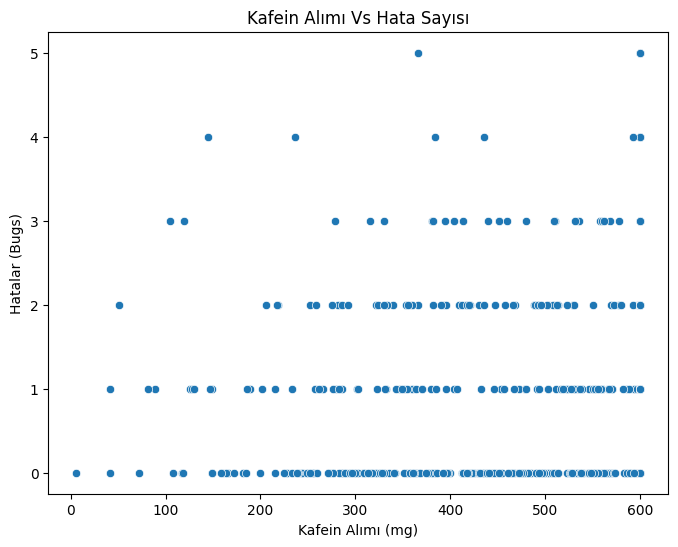

In [4]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='coffee_intake_mg', y='bugs_reported', data=data)
plt.title('Kafein Alƒ±mƒ± Vs Hata Sayƒ±sƒ±')
plt.xlabel('Kafein Alƒ±mƒ± (mg)')
plt.ylabel('Hatalar (Bugs)')
plt.show()

In [5]:
#korelasyon hesaplama
korelasyon= data['coffee_intake_mg'].corr(data['bugs_reported'])
print(f"Kafein alƒ±mƒ± ile hata sayƒ±sƒ± arasƒ±ndaki korelasyon: {korelasyon}")

Kafein alƒ±mƒ± ile hata sayƒ±sƒ± arasƒ±ndaki korelasyon: 0.04626122475964644


In [6]:
#kafein alƒ±mƒ± kategorilere ayƒ±rma
data['coffee_kategori'] = pd.cut(data['coffee_intake_mg'], bins=[0, 200, 400, 600], labels=['D√º≈ü√ºk', 'Orta', 'Y√ºksek'])
print(data.coffee_kategori)

0      Y√ºksek
1      Y√ºksek
2      Y√ºksek
3      Y√ºksek
4      Y√ºksek
        ...  
495    Y√ºksek
496      Orta
497    Y√ºksek
498      Orta
499      Orta
Name: coffee_kategori, Length: 500, dtype: category
Categories (3, object): ['D√º≈ü√ºk' < 'Orta' < 'Y√ºksek']


In [7]:
#kafein kategorierine g√∂re ortalama hata sayƒ±sƒ±
coffee_bugs= data.groupby('coffee_kategori')['bugs_reported'].mean()
print("\nKafein kategorilerine g√∂re ortalama hata sayƒ±sƒ±:")
print(coffee_bugs)


Kafein kategorilerine g√∂re ortalama hata sayƒ±sƒ±:
coffee_kategori
D√º≈ü√ºk     0.741935
Orta      0.842975
Y√ºksek    0.873563
Name: bugs_reported, dtype: float64


/tmp/ipykernel_13/536599236.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  coffee_bugs= data.groupby('coffee_kategori')['bugs_reported'].mean()


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


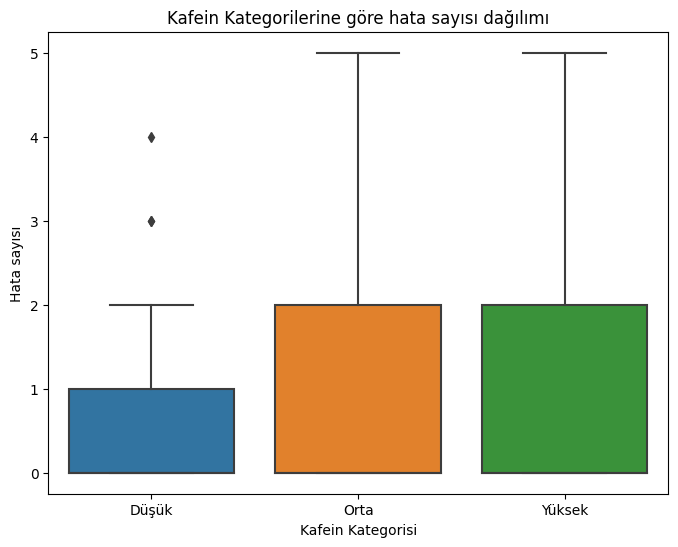

In [8]:
#kafein kategorilerine g√∂re hata sayƒ±sƒ± grafiƒüi
plt.figure(figsize=(8,6))
sns.boxplot(x='coffee_kategori', y='bugs_reported', data=data)
plt.title('Kafein Kategorilerine g√∂re hata sayƒ±sƒ± daƒüƒ±lƒ±mƒ±')
plt.xlabel('Kafein Kategorisi')
plt.ylabel('Hata sayƒ±sƒ±')
plt.show()

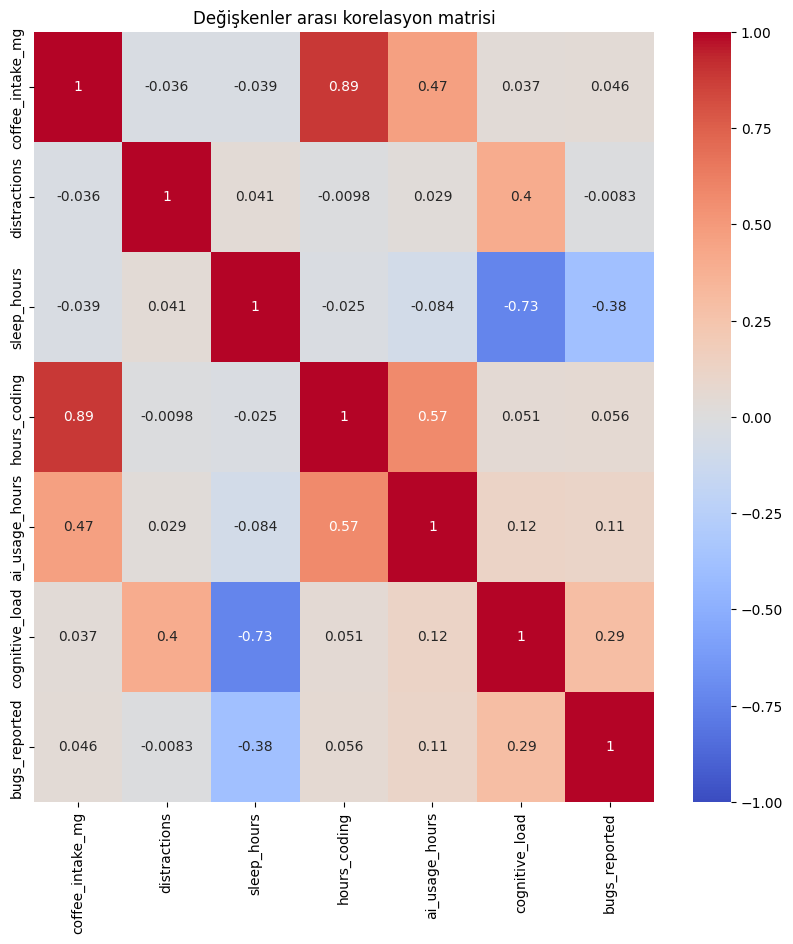

Hatalar ve diƒüer deƒüi≈ükenlerin korelasyonu: 
coffee_intake_mg    0.046261
distractions       -0.008341
sleep_hours        -0.384424
hours_coding        0.055979
ai_usage_hours      0.113885
cognitive_load      0.292640
bugs_reported       1.000000
Name: bugs_reported, dtype: float64


In [9]:
#korelasyon matrisi
corr_matrix= data[['coffee_intake_mg', 'distractions', 'sleep_hours', 'hours_coding', 'ai_usage_hours', 'cognitive_load', 'bugs_reported']].corr()

#korelasyon g√∂rselle≈ütirme
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Deƒüi≈ükenler arasƒ± korelasyon matrisi')
plt.show()

#hata ve diƒüer deƒüi≈ükenlerin korelasyonu
print('Hatalar ve diƒüer deƒüi≈ükenlerin korelasyonu: ')
print(corr_matrix['bugs_reported'])

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
data = pd.read_csv('/kaggle/input/ai-developer-productivity-dataset/ai_dev_productivity.csv')

In [12]:
#√∂zellikler ve hedef
X = data[['coffee_intake_mg', 'sleep_hours', 'cognitive_load', 'hours_coding', 'ai_usage_hours', 'distractions']]
y = data['bugs_reported']

In [13]:
#veriyi ayƒ±r
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modeli eƒüit
model= RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

#Tahmin
y_pred = model.predict(X_test)

In [14]:
#Performans
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")

#√∂zellik √∂nem dereceleri
print("\n√ñzellik √∂nem dereceleri:")
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f"{feature}: {importance}")

MSE: 1.2701740000000001
R2: -0.09394022909310129

√ñzellik √∂nem dereceleri:
coffee_intake_mg: 0.10104622858825031
sleep_hours: 0.3115165944519923
cognitive_load: 0.142947759054864
hours_coding: 0.15577336464754354
ai_usage_hours: 0.2207321151176821
distractions: 0.06798393813966776


### XGBoost denemesi

In [15]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# √ñzellikler ve hedef
X = data[['coffee_intake_mg', 'sleep_hours', 'cognitive_load', 'hours_coding', 'ai_usage_hours', 'distractions']]
y = data['bugs_reported']

# Veriyi ayƒ±r
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eƒüit
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

In [17]:
# Performans
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R¬≤: {r2_score(y_test, y_pred)}")

# √ñzellik √∂nem dereceleri
print("\n√ñzellik √∂nem dereceleri:")
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f"{feature}: {importance}")

MSE: 1.660968667092977
R¬≤: -0.4305130196305027

√ñzellik √∂nem dereceleri:
coffee_intake_mg: 0.08935320377349854
sleep_hours: 0.2901898920536041
cognitive_load: 0.14481568336486816
hours_coding: 0.14597643911838531
ai_usage_hours: 0.19773083925247192
distractions: 0.13193389773368835


### Veri √∂l√ßeklendirme

In [18]:
# √ñzellikler ve hedef
X = data[['coffee_intake_mg', 'sleep_hours', 'cognitive_load', 'hours_coding', 'ai_usage_hours', 'distractions']]
y = data['bugs_reported']

# Veriyi √∂l√ßeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veriyi ayƒ±r
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modeli eƒüit
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

In [19]:
# Performans
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R¬≤: {r2_score(y_test, y_pred)}")

# √ñzellik √∂nem dereceleri
print("\n√ñzellik √∂nem dereceleri:")
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f"{feature}: {importance}")

MSE: 1.660968667092977
R¬≤: -0.4305130196305027

√ñzellik √∂nem dereceleri:
coffee_intake_mg: 0.08935320377349854
sleep_hours: 0.2901898920536041
cognitive_load: 0.14481568336486816
hours_coding: 0.14597643911838531
ai_usage_hours: 0.19773083925247192
distractions: 0.13193389773368835


### Aykƒ±rƒ± deƒüerleri kontrol etme

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


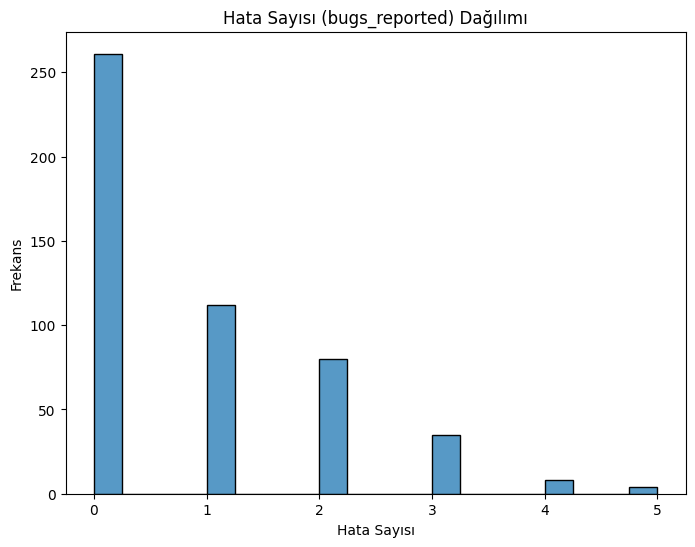

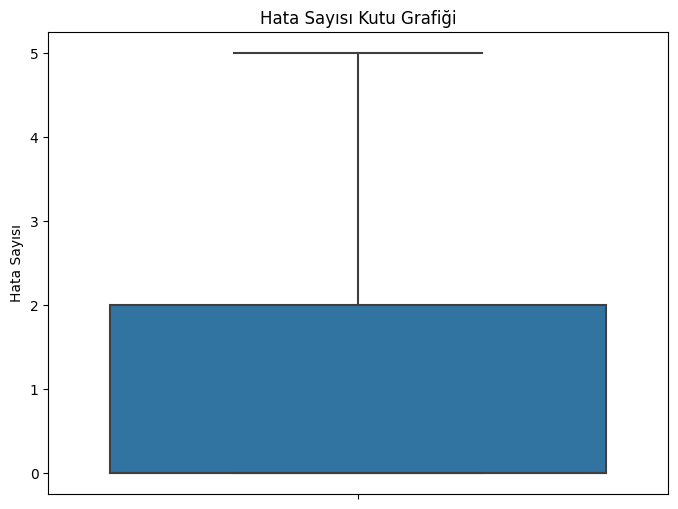

Aykƒ±rƒ± deƒüer sayƒ±sƒ±: 0
Empty DataFrame
Columns: [coffee_intake_mg, sleep_hours, cognitive_load, bugs_reported]
Index: []


In [21]:
# bugs_reported daƒüƒ±lƒ±mƒ±
plt.figure(figsize=(8, 6))
sns.histplot(data['bugs_reported'], bins=20)
plt.title('Hata Sayƒ±sƒ± (bugs_reported) Daƒüƒ±lƒ±mƒ±')
plt.xlabel('Hata Sayƒ±sƒ±')
plt.ylabel('Frekans')
plt.show()

# Aykƒ±rƒ± deƒüerler i√ßin kutu grafiƒüi
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['bugs_reported'])
plt.title('Hata Sayƒ±sƒ± Kutu Grafiƒüi')
plt.ylabel('Hata Sayƒ±sƒ±')
plt.show()

# Aykƒ±rƒ± deƒüerleri tespit (IQR y√∂ntemi)
Q1 = data['bugs_reported'].quantile(0.25)
Q3 = data['bugs_reported'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['bugs_reported'] < Q1 - 1.5 * IQR) | (data['bugs_reported'] > Q3 + 1.5 * IQR)]
print(f"Aykƒ±rƒ± deƒüer sayƒ±sƒ±: {len(outliers)}")
print(outliers[['coffee_intake_mg', 'sleep_hours', 'cognitive_load', 'bugs_reported']])

In [22]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# bugs_reported deƒüerlerinin daƒüƒ±lƒ±mƒ±
print("bugs_reported deƒüerlerinin frekansƒ±:")
print(data['bugs_reported'].value_counts())

# √ñzellikler ve hedef
X = data[['coffee_intake_mg', 'sleep_hours', 'cognitive_load', 'hours_coding', 'ai_usage_hours', 'distractions']]
y = data['bugs_reported']

# Veriyi √∂l√ßeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veriyi ayƒ±r
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# SVR modelini eƒüit
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Performans
print(f"\nMSE: {mean_squared_error(y_test, y_pred)}")
print(f"R¬≤: {r2_score(y_test, y_pred)}")

bugs_reported deƒüerlerinin frekansƒ±:
bugs_reported
0    261
1    112
2     80
3     35
4      8
5      4
Name: count, dtype: int64

MSE: 1.2482962943420004
R¬≤: -0.07509800563431246


### ƒ∞kili sƒ±nƒ±flandƒ±rma denemesi

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [25]:
# bugs_reported'ƒ± ikili yap: 0 (hata yok), 1 (hata var)
data['has_bug'] = data['bugs_reported'].apply(lambda x: 1 if x > 0 else 0)

# √ñzellikler ve hedef
X = data[['coffee_intake_mg', 'sleep_hours', 'cognitive_load', 'hours_coding', 'ai_usage_hours', 'distractions']]
y = data['has_bug']

# Veriyi √∂l√ßeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veriyi ayƒ±r
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Rastgele Orman sƒ±nƒ±flandƒ±rma modeli
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Performans
print(f"Doƒüruluk: {accuracy_score(y_test, y_pred)}")
print("\nSƒ±nƒ±flandƒ±rma Raporu:")
print(classification_report(y_test, y_pred))

# √ñzellik √∂nem dereceleri
print("\n√ñzellik √∂nem dereceleri:")
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f"{feature}: {importance}")

Doƒüruluk: 0.59

Sƒ±nƒ±flandƒ±rma Raporu:
              precision    recall  f1-score   support

           0       0.63      0.57      0.60        54
           1       0.55      0.61      0.58        46

    accuracy                           0.59       100
   macro avg       0.59      0.59      0.59       100
weighted avg       0.59      0.59      0.59       100


√ñzellik √∂nem dereceleri:
coffee_intake_mg: 0.13423281612657342
sleep_hours: 0.24849591372709895
cognitive_load: 0.17836646073550677
hours_coding: 0.16718082465255485
ai_usage_hours: 0.18909590690332695
distractions: 0.08262807785493913


### Logistic Regresyon denemesi 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [27]:
# Yeni √∂zellik: coffee_per_sleep
data['coffee_per_sleep'] = data['coffee_intake_mg'] / data['sleep_hours']

# bugs_reported'ƒ± ikili yap
data['has_bug'] = data['bugs_reported'].apply(lambda x: 1 if x > 0 else 0)

# √ñzellikler ve hedef
X = data[['coffee_intake_mg', 'sleep_hours', 'cognitive_load', 'hours_coding', 'ai_usage_hours', 'distractions', 'coffee_per_sleep']]
y = data['has_bug']

# Veriyi √∂l√ßeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veriyi ayƒ±r
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lojistik Regresyon modeli
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Performans
print(f"Doƒüruluk: {accuracy_score(y_test, y_pred)}")
print("\nSƒ±nƒ±flandƒ±rma Raporu:")
print(classification_report(y_test, y_pred))

# √ñzellik katsayƒ±larƒ±
print("\n√ñzellik katsayƒ±larƒ±:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef}")

Doƒüruluk: 0.57

Sƒ±nƒ±flandƒ±rma Raporu:
              precision    recall  f1-score   support

           0       0.61      0.57      0.59        54
           1       0.53      0.57      0.55        46

    accuracy                           0.57       100
   macro avg       0.57      0.57      0.57       100
weighted avg       0.57      0.57      0.57       100


√ñzellik katsayƒ±larƒ±:
coffee_intake_mg: -0.34040039309345355
sleep_hours: -0.5610700504803717
cognitive_load: 0.03948469267204935
hours_coding: -0.139886693466667
ai_usage_hours: 0.37694179935231426
distractions: -0.07372617109118602
coffee_per_sleep: 0.47054600295619237


# üß† AI Developer Productivity Dataset Analysis  
**Dataset Exploration & Machine Learning Experiments**

---

## üéØ Objective

This study explores the impact of caffeine intake (`coffee_intake_mg`) on coding errors (`bugs_reported`) using the AI Developer Productivity dataset. We also evaluate other influencing factors such as sleep duration, distractions, and cognitive load, and perform machine learning experiments to predict the number of bugs.

---

## üìã Dataset Overview

- **Size:** 500 rows, 9 columns  
- **Target Variable:** `bugs_reported` (range: 0‚Äì5, 52% are zero)
- **Features:**
  - `hours_coding`
  - `coffee_intake_mg`
  - `distractions`
  - `sleep_hours`
  - `commits`
  - `ai_usage_hours`
  - `cognitive_load`
  - `task_success`

---

## üîç Exploratory Data Analysis (EDA)

### üîó Correlations

| Feature             | Correlation | Insight                          |
|---------------------|-------------|----------------------------------|
| `sleep_hours`       | **-0.38**   | More sleep ‚Üí fewer bugs         |
| `cognitive_load`    | **0.29**    | Higher load ‚Üí more bugs         |
| `coffee_intake_mg`  | **0.046**   | Very weak positive correlation  |
| `ai_usage_hours`, `hours_coding`, `distractions` | < 0.15 | Weak correlations |

### ‚òï Caffeine Categories

| Category         | Avg. Bugs |
|------------------|-----------|
| Low (<200 mg)    | 0.74      |
| Medium (200‚Äì400) | 0.84      |
| High (>400 mg)   | 0.87      |

> Slight increase in bugs with higher caffeine levels.

### ‚ö†Ô∏è Bug Distribution

- 52% of `bugs_reported` values are **zero**, which makes learning more difficult for models.

---

## ü§ñ Machine Learning Experiments

### üîß Regression Models

| Model                    | MSE   | R¬≤     | Comment           |
|--------------------------|-------|--------|-------------------|
| Linear Regression        | 1.27  | -0.09  | Poor performance  |
| Random Forest Regressor  | 1.27  | -0.09  | Weak performance  |
| XGBoost Regressor        | 1.66  | -0.43  | Failed even after scaling |
| Support Vector Regressor | 1.25  | -0.08  | Slightly better   |

### üîÅ Classification (Logistic Regression)

- Converted `bugs_reported` into binary `has_bug` (0: no bug, 1: bug reported)
- Added feature: `coffee_per_sleep = coffee_intake_mg / sleep_hours`
- **Accuracy:** 0.57  
- **F1-scores:** ~0.55‚Äì0.59

#### üîç Top Features (by coefficient impact):
- `sleep_hours`: -0.56  
- `coffee_per_sleep`: 0.47  
- `ai_usage_hours`: 0.38  

---

## üìå Key Findings

- **Caffeine intake** has **very weak correlation** with coding errors.
- **Sleep hours** significantly reduce errors and are the most important predictor.
- **AI usage hours** and **coffee-to-sleep ratio** may increase bug occurrence.
- Regression models failed to explain the data (negative R¬≤).
- Logistic regression performed slightly better for binary classification.

---

## ‚ö†Ô∏è Limitations

- 52% of target values are zero, leading to imbalance in regression and classification.
- Weak feature-target relationships limit model performance.
- Dataset lacks important factors like project complexity, developer experience, and team size.

---

## ‚úÖ Conclusion

There is **no significant evidence** that caffeine intake affects bug count.  
Sleep duration and AI usage appear more influential.  
More complete datasets with additional context (project type, experience level) are required for deeper insights and better predictive modeling.

---

> üìÅ Dataset Source: [AI Developer Productivity Dataset on Kaggle](https://www.kaggle.com/datasets/atharvasoundankar/ai-developer-productivity-dataset)
